# $Authors:$
* Yussuf Hersi
* Bravin Mugangasia
* Pauline Wambui.
* Kibet Kemboi
* Brian Kisilu
* Ronald Nyagaka

# Problem Statement
The business problem the client is facing is how to create a successful platform for buying and selling houses in King County. To achieve this goal, the platform needs to provide accurate estimates of house prices, which is crucial for both buyers and sellers.

To accomplish this, the client wants to use a model that can infer the most important features that determine house prices in King County. These features might include factors such as the location of the house, the number of bedrooms and bathrooms, the size of the house, and other relevant factors.

The model needs to be trained on data that accurately represents the real estate market in King County, including historical sales data, current property listings, and other relevant data sources. By using this data, the model can learn to accurately estimate the value of a house based on its features.

Once the model is trained, it can be integrated into the platform to provide buyers and sellers with accurate estimates of house prices, which can help them make informed decisions about buying or selling a property. By providing a reliable and accurate platform for buying and selling houses in King County, the client can establish themselves as a leader in the local real estate market and attract a large and loyal customer base. 

### Project Objectives 
* To identify the key features that significantly influence house prices in King County.
* To develop a model that accurately estimates house prices based on the identified features.
* To evaluate the performance of the developed model in estimating house prices in King County.


In [103]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Loading Our DataFrame
df = pd.read_csv("kc_house_data.csv")

# Viewing the First Five Rows 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [105]:
# Getting information of data types of our files 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* The date and yr_built and yr_renovated are supposed ro be DateType Variables.
* The sqft_basement is an object and is supposed to be an int type variable. 

### Modifying the Column Data Types 

1.   Dates 



In [106]:
# Changing the date to date time
df['date'] = pd.to_datetime(df['date'])
# Extracting only the year from the column Date
df.date = df['date'].dt.year

# Changing the dates for the year built 
df['yr_built'] = pd.to_datetime(df['yr_built'],format='%Y').dt.year

2. Sqft Basement

In [107]:
# Changing the sqft_basement from object to int
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')

### Checking for Duplicates and NaN Values

In [108]:
# Checking for NaN Values as a % of the whole Data Set 

(df.isnull().sum())/len(df)*100


id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.102144
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

* yr_renovated has the highest % of NaN values ```17%```. This will be dropped since it will not be used within our model inline with the business problem. 
* waterfront has ```11%``` of NaN values. This will be filled with ```No``` based on the assumption that they do not have waterfront.
* For view and sqft_basement NaN values will be dropped by row.

1. NaN Values 

In [109]:
# Dropping the yr_renovated column 
df.drop('yr_renovated',axis=1,inplace=True)

In [110]:
# Filling the NaN values for waterfront with NO
df.waterfront.fillna('NO',inplace=True)

In [111]:
# Dropping the NaN values for View per column 
df.dropna(subset=['view'],inplace=True)

In [112]:
# Dropping the NaN values from the sqft_basement column 
df.dropna(subset=['sqft_basement'],inplace=True)

2. Duplicates 

In [113]:
# Checking for duplicate values 
df.duplicated().sum()

2

In [114]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3947,1825069031,2014,550000.0,4,1.75,2410,8447,2.0,NO,GOOD,Good,8 Good,2060,350.0,1936,98074,47.6499,-122.088,2520,14789
20038,8648900110,2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,Average,8 Good,1940,0.0,2009,98027,47.5644,-122.093,1880,3078


* these are not true duplicates since some columns are different from one another

### Basic Exploratory Data Analysis 

In [115]:
# getting basic Statistics of our data set 
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,2014.323024,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,1789.000000,291.359975,1971.023337,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,2.876423e+09,0.467643,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,828.369355,442.007858,29.323120,53.528769,0.138568,0.140607,685.544250,27148.781580
min,1.000102e+06,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,2014.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,1200.000000,0.000000,1952.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,3.904970e+09,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,1560.000000,0.000000,1975.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,7.312200e+09,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,2210.000000,560.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,9.900000e+09,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* The bedrooms column has a house with ```33``` rooms. This might be an outlier as it is far removed from the mean value of ```3``` room. This warrants further investigation.
* The ```id``` column will be dropped since it serves no purpose in our model.
* The ```lat``` and ```long``` columns will be dropped since it serves no purpose in our model.

### Bedrooms 

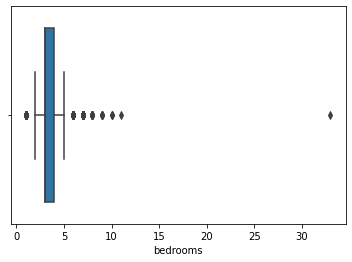

In [116]:
# Box Plot to investigate the bedrooms column
sns.boxplot(df.bedrooms);

In [117]:
# Viewing the whole row
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


* 33 must have been a typo since the house is fairly small. This will be amended to 3 beadrooms



In [118]:
# amending the bedroom variable 33 replacing it with 3 

def replace_bedrooms(df):
    df.bedrooms = df.bedrooms.replace(33, 3)

In [119]:
replace_bedrooms(df)

In [120]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,2014.323024,5.402469e+05,3.37098,2.115916,2080.359975,1.507759e+04,1.49362,1789.000000,291.359975,1971.023337,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,2.876423e+09,0.467643,3.667323e+05,0.90221,0.768142,917.856396,4.117338e+04,0.53937,828.369355,442.007858,29.323120,53.528769,0.138568,0.140607,685.544250,27148.781580
min,1.000102e+06,2014.000000,7.800000e+04,1.00000,0.500000,370.000000,5.200000e+02,1.00000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,2014.000000,3.220000e+05,3.00000,1.750000,1430.000000,5.040000e+03,1.00000,1200.000000,0.000000,1952.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,3.904970e+09,2014.000000,4.500000e+05,3.00000,2.250000,1910.000000,7.620000e+03,1.50000,1560.000000,0.000000,1975.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,7.312200e+09,2015.000000,6.450000e+05,4.00000,2.500000,2550.000000,1.069775e+04,2.00000,2210.000000,560.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,9.900000e+09,2015.000000,7.700000e+06,11.00000,8.000000,13540.000000,1.651359e+06,3.50000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Dropping the ```id```, ```lat``` and ```long``` Columns

In [121]:
# Defining a function that drop three columns 
def drop (col1, col2, col3):
  df.drop([col1,col2,col3],inplace = True, axis = 1)

In [122]:
# Dropping the id, lat and long columns 
drop('id','lat','long')

### View column 

* changing the view columns and assigning integer scores so that we can get relevant stats on the column

In [123]:
# getting the summary all value counts in the view column

df.view.value_counts()

NONE         19018
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [124]:
# assigning numeral variables to each string variable

view_dict = {'NONE': 0,
'AVERAGE': 1,
'GOOD': 2,
'FAIR': 3,
'EXCELLENT': 4}

In [125]:
# replacing the strings with integer scores

df.view = df.view.replace(view_dict)

In [126]:
df.describe().view

count    21082.000000
mean         0.196708
std          0.689332
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

* from this it can be seen that most houses have no views, and this could be caused by the locations of where they are built. Houses with no views may be cheaper hence preferred by most people

### Waterfront column

* getting the value counts of identifiable variables in waterfront columns and editing them if necessary

In [127]:
# getting the value counts 
df.waterfront.value_counts()

NO     20941
YES      141
Name: waterfront, dtype: int64

In [128]:
# creating a dictionary of integer scores
waterfront_dict = {'NO': 0,
                   'YES':1}
# replacing no and yes with the values in our dictionaries
df.waterfront = df.waterfront.replace(waterfront_dict)

In [129]:
df.describe().waterfront

count    21082.000000
mean         0.006688
std          0.081509
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

* from this it would seem that most houses do not have a waterfront

### grade column

* Basic understanding and analysis of grade column

In [130]:
# getting the value counts of unique items in the grade column

df.grade.value_counts()

7 Average        8762
8 Good           5922
9 Better         2546
6 Low Average    1991
10 Very Good     1108
11 Excellent      389
5 Fair            235
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [131]:
# separating the string to form integer of grade values
df.grade = df.grade.apply(lambda x: int(x.split(" ").pop(0)))


In [132]:
# getting basic statistics of the grade column
df.describe().grade

count    21082.000000
mean         7.657717
std          1.173690
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

* Theres a mean grade of ```7.65``` hence most houses are graded as average

### Condition column
* transforming the column into integer scores 

In [133]:
# viewing the current values of the column
df.condition.value_counts()

Average      13688
Good          5538
Very Good     1662
Fair           166
Poor            28
Name: condition, dtype: int64

In [134]:
# transforming the data into integer scores by first creating a dictionary
cond_dict = {'Poor': 0,
             'Fair': 1,
             'Average': 2,
             'Good': 3,
             'Very Good': 4}
df.condition = df.condition.replace(cond_dict)

In [135]:
# getting basic stats of the conditions column
df.describe().condition

count    21082.000000
mean         2.409828
std          0.650597
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: condition, dtype: float64

* the mean of 2 indicates that most houses' condition is avaerage

#### DATA VISUALIZATION OF OUR VARIABLES

In [136]:
# creating a list of all column names
plot_list = list(df.columns)

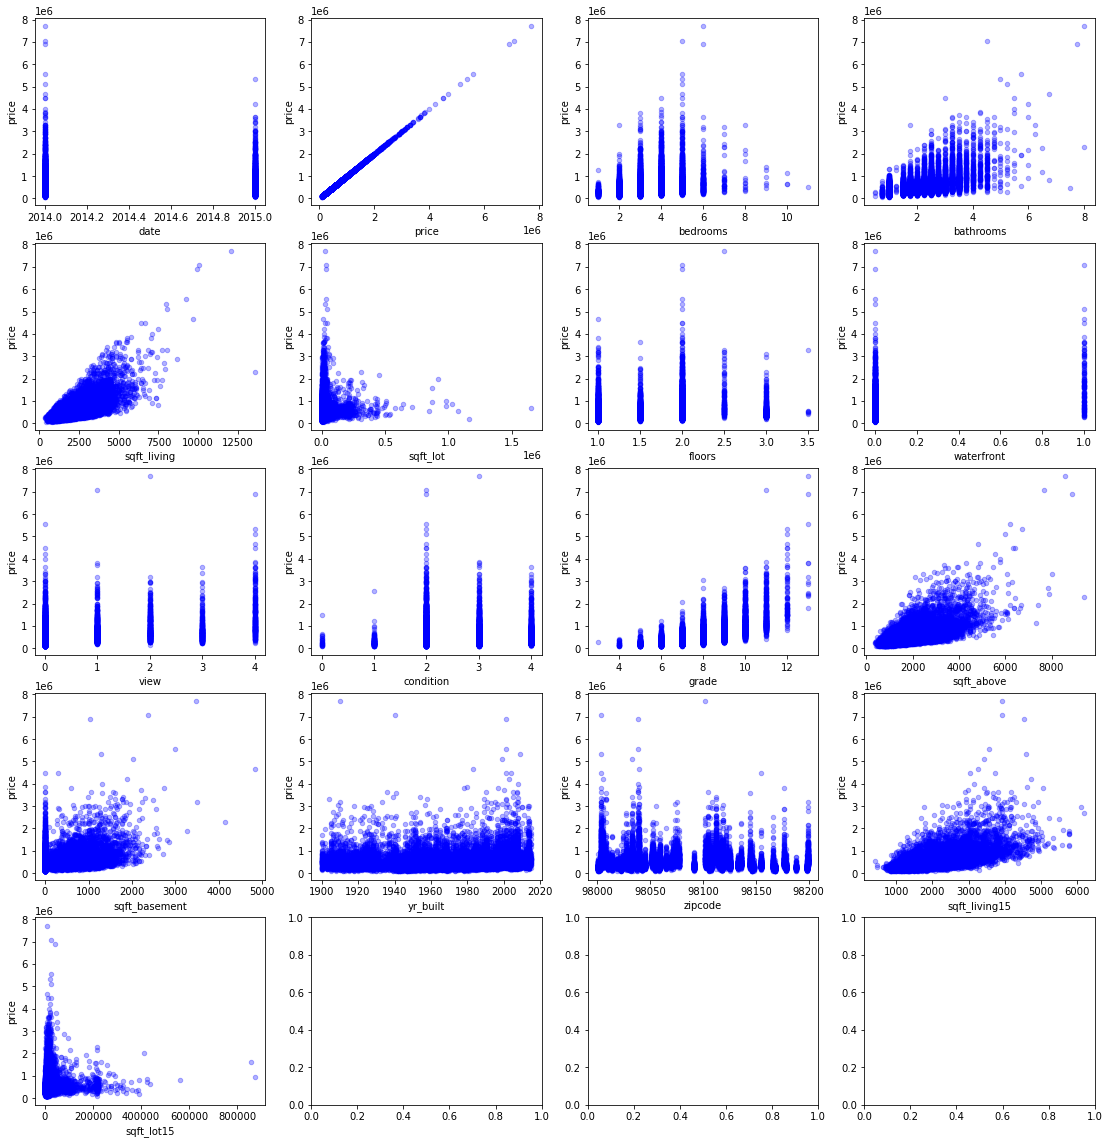

In [137]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(19,20))
axes = axes.flatten() # flatten the array to make it easier to iterate over

for i, xcol in enumerate(plot_list[0:18]):
    df.plot(kind='scatter', x=xcol, y='price', ax=axes[i], alpha=0.3, color='b')
    
plt.show() # add this to display the plot

In [138]:
df.correlation = df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
df.correlation

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
date,1.00,0.00,-0.01,-0.02,-0.03,0.01,-0.02,-0.01,0.00,-0.04,-0.03,-0.02,-0.02,0.00,0.00,-0.02,0.00
price,0.00,1.00,0.32,0.53,0.70,0.09,0.26,0.26,0.39,0.03,0.67,0.61,0.32,0.05,-0.05,0.59,0.08
bedrooms,-0.01,0.32,1.00,0.53,0.59,0.03,0.18,-0.00,0.07,0.02,0.37,0.49,0.31,0.16,-0.16,0.40,0.03
bathrooms,-0.02,0.53,0.53,1.00,0.75,0.09,0.50,0.06,0.17,-0.13,0.67,0.69,0.28,0.51,-0.20,0.57,0.09
sqft_living,-0.03,0.70,0.59,0.75,1.00,0.17,0.35,0.10,0.26,-0.06,0.76,0.88,0.43,0.32,-0.20,0.76,0.18
sqft_lot,0.01,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.05,-0.01,0.11,0.18,0.02,0.05,-0.13,0.14,0.72
floors,-0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.02,-0.26,0.46,0.52,-0.25,0.49,-0.06,0.28,-0.01
waterfront,-0.01,0.26,-0.00,0.06,0.10,0.02,0.02,1.00,0.41,0.02,0.08,0.07,0.08,-0.02,0.03,0.08,0.03
view,0.00,0.39,0.07,0.17,0.26,0.05,0.02,0.41,1.00,0.05,0.23,0.15,0.27,-0.05,0.09,0.26,0.05
condition,-0.04,0.03,0.02,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,0.17,-0.36,0.00,-0.09,-0.00


* ```date``` has no correlation with price as per our visualizations this will be dropped
* ```sqft_lot``` has a less than ```0.1``` correlation with price this will be dropped
* ```condition``` has a correlation with price of ```0.03``` this will be dropped
* ```sqft_lot15``` has a correlation of ```0.03``` against price, this will dropped
* ```yr_built``` has a correlation of ```0.05``` against price, this will dropped
* ```zipcode``` has a correlation of ```-0.05``` against price, this will dropped

##### columns to drop
* _date_
* _sqft lot_
* _condition_
* _sqft lot15_
* _yr built_
* _zipcode_

In [139]:
# dropping the named columns 
columns_dropped = ['date','sqft_lot','sqft_lot15', 'condition','yr_built', 'zipcode']

base_model_df = df.drop(columns_dropped, axis=1)


In [140]:
# visualizing our base model df
df.correlation = base_model_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
df.correlation

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15
price,1.00,0.32,0.53,0.70,0.26,0.26,0.39,0.67,0.61,0.32,0.59
bedrooms,0.32,1.00,0.53,0.59,0.18,-0.00,0.07,0.37,0.49,0.31,0.40
bathrooms,0.53,0.53,1.00,0.75,0.50,0.06,0.17,0.67,0.69,0.28,0.57
sqft_living,0.70,0.59,0.75,1.00,0.35,0.10,0.26,0.76,0.88,0.43,0.76
floors,0.26,0.18,0.50,0.35,1.00,0.02,0.02,0.46,0.52,-0.25,0.28
waterfront,0.26,-0.00,0.06,0.10,0.02,1.00,0.41,0.08,0.07,0.08,0.08
view,0.39,0.07,0.17,0.26,0.02,0.41,1.00,0.23,0.15,0.27,0.26
grade,0.67,0.37,0.67,0.76,0.46,0.08,0.23,1.00,0.76,0.17,0.71
sqft_above,0.61,0.49,0.69,0.88,0.52,0.07,0.15,0.76,1.00,-0.05,0.73
sqft_basement,0.32,0.31,0.28,0.43,-0.25,0.08,0.27,0.17,-0.05,1.00,0.20


### Multicollinearity of Features


In [141]:
# convert all features that have a correlation to price of more than 0.3
set1 = list(base_model_df.corr()[abs(base_model_df.corr()['price'])> 0.3].index)
set1.remove('price')


In [142]:
# viewing multicolinearity between features

# defining the specific data frame we will test for multicollinear relationship
coll_df = base_model_df.loc[:,set1]

# getting the overall mean of each feature's collinearity with other features
print(coll_df.corr().mean().sort_values(),'\n')

view             0.302503
sqft_basement    0.325613
bedrooms         0.470770
sqft_living15    0.579526
sqft_above       0.579942
bathrooms        0.582108
grade            0.582410
sqft_living      0.680204
dtype: float64 



* from this, we can drop sqft_above as it has a high multi-collinear relationship with other features and is a make up of space above basement
  

In [143]:
base_model_df = base_model_df.drop(columns = 'sqft_above', axis=1)

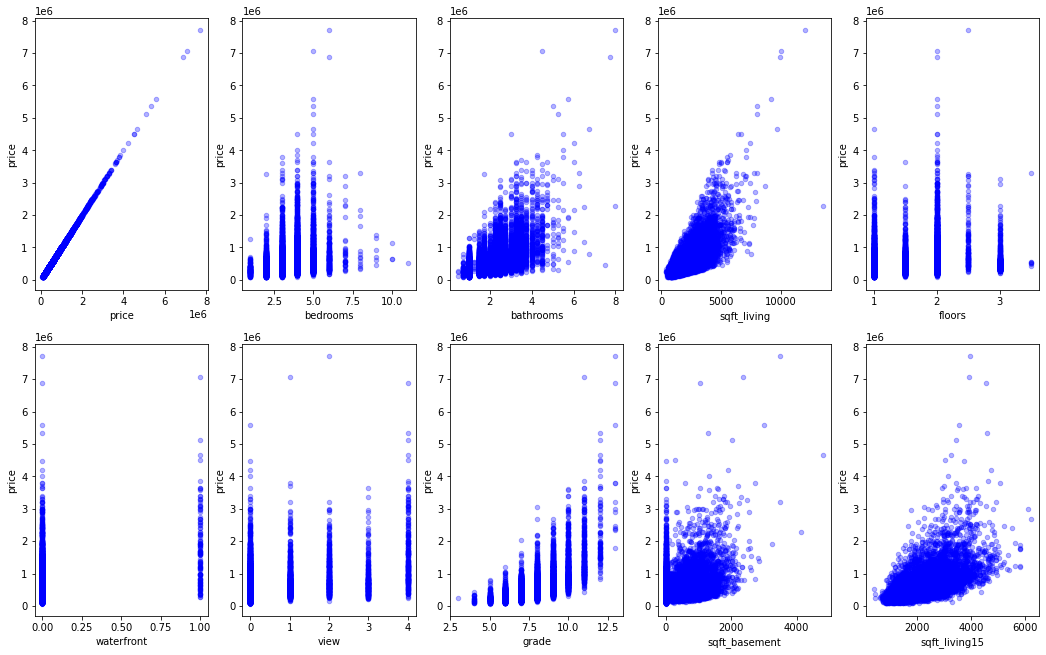

In [144]:

plot_list2 = list(base_model_df.columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18,11))
axes = axes.flatten() # flatten the array to make it easier to iterate over

for i, xcol in enumerate(plot_list2[0:11]):
    df.plot(kind='scatter', x=xcol, y='price', ax=axes[i], alpha=0.3, color='b')

### Base Model

In [145]:
y = base_model_df['price']
x = base_model_df[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_basement','sqft_living15']]
base_mod = sm.OLS(y, sm.add_constant(x)).fit()
base_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3481.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:44:36   Log-Likelihood:            -2.9042e+05
No. Observations:               21082   AIC:                         5.809e+05
Df Residuals:                   21072   BIC:                         5.809e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.897e+05   1.47e+04    -33.388      0.000   -5.18e+05   -4.61e+05
bedrooms      -3.331e+04   2295.654    -14.510      0.000   -3.78e+04   -2.88e+04
bathrooms     -1.744e+04   3575.212     -4.878      0.000   -2.44e+04   -1.04e+04
sqft_living     181.3337      4.171     43.478      0.000     173.159     189.509
floors        -9130.8382   4021.690     -2.270      0.023    -1.7e+04   -1248.017
waterfront     5.729e+05   2.16e+04     26.515      0.000    5.31e+05    6.15e+05
view           7.381e+04   2712.893     27.206      0.000    6.85e+04    7.91e+04
grade          1.005e+05   2422.673     41.484      0.000    9.58e+04    1.05e+05
sqft_basement    45.4222      4.860      9.346      0.000      35.896      54.948
sqft_living15     7.1923      3.893      1.847      0.065      -0.439      14.823
==============================================================================
Omnibus:                    15047.759   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           869447.291
Skew:                           2.840   Prob(JB):                         0.00
Kurtosis:                      33.944   Cond. No.                     4.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
# Drop the sqft_living15 column
base_model_df.drop('sqft_living15', axis=1, inplace=True)

### Checking for assumptions.

1. Linearity: Check for linearity by plotting the dependent variable against each independent variable. If the relationship appears to be nonlinear, we  may need to transform one or more variables or use a different type of model.

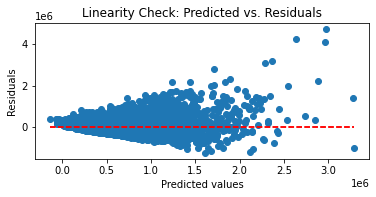

In [147]:

# plotting predicted values vs. residuals
def linearity_check(model):
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    fig, ax = plt.subplots(figsize=(6,2.5))
    _ = ax.scatter(model_fitted_y, model_residuals)

    # adding horizontal line at y=0
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='r', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    ax.hlines(y=0, xmin=model_fitted_y.min(), xmax=model_fitted_y.max(), colors='r', linestyles='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    plt.show()

linearity_check(base_mod)



*  The model is not linear as the residuals are not randomly distributed around the horizontal line at y=0.

2. Normality: Check for normality of residuals by plotting a histogram of the residuals and examining whether they are normally distributed. We can also use a normal probability plot or a statistical test such as the Shapiro-Wilk test.

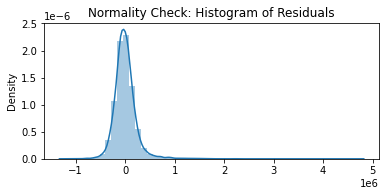

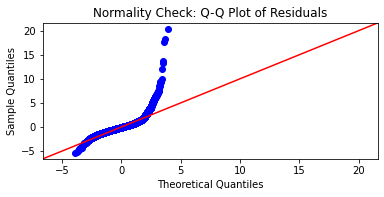

In [148]:
import scipy.stats as stats



# plotting histogram of residuals
def normality_check(residuals):
    fig, ax = plt.subplots(figsize=(6,2.5))
    sns.distplot(residuals)
    ax.set_title('Normality Check: Histogram of Residuals');
    
    fig, ax = plt.subplots(figsize=(6,2.5))
    _ = sm.qqplot(residuals, fit=True, line='45', ax=ax)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.set_title('Normality Check: Q-Q Plot of Residuals');
    plt.show()



normality_check(base_mod.resid)


*  The model is not linear as the residuals are not normally distributed

3. Homoscedasticity: Check for homoscedasticity (equal variance) of residuals by plotting the residuals against the predicted values. If the residuals appear to fan out or form a funnel shape, this indicates heteroscedasticity (unequal variance) and may require a transformation or a different model.

In [149]:
# plotting residuals vs. fitted values
def homoscedasticity_check(residuals, fitted_values):
    fig, ax = plt.subplots(figsize=(6,2.5))
    _ = ax.scatter(fitted_values, residuals, alpha=.5)

    # add horizontal line at y=0
    ax.hlines(y=0, xmin=fitted_values.min(), xmax=fitted_values.max(), colors='r', linestyles='--')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Homoscedasticity Check: Residuals vs. Fitted Values')
    plt.show()

homoscedasticity_check(model_residuals, model_fitted_y)

NameError: name 'model_residuals' is not defined

* The spread of residuals is not consistent throught the range hence it is heterocedastic 

4. Independence: Check for independence of residuals by plotting the residuals against the order in which they were observed or against time (if applicable). If there is a pattern or correlation, this indicates that the model may not be capturing all relevant information.

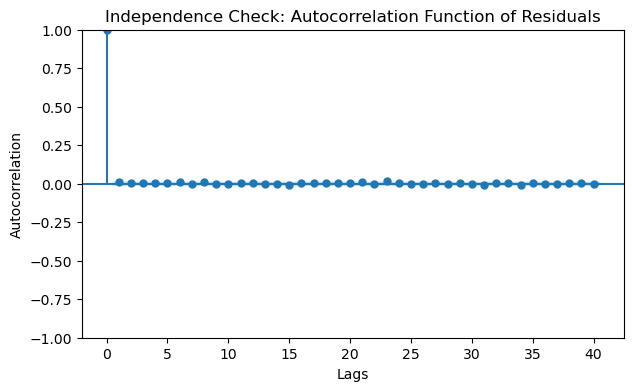

In [ ]:
# plotting autocorrelation function of residuals
def independence_check(residuals):
    fig, ax = plt.subplots(figsize=(7,4))
    _ = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    ax.set_title('Independence Check: Autocorrelation Function of Residuals')
    plt.show()

independence_check(model_residuals)

* Their is a temporary difference in the residuals
* The presence of one pick outside the confidence intervals suggests pressence of signifince of autocorrelation in the residuals indicating that the model is not capturing all the temporal dependence in the data.

In [ ]:
from sklearn.linear_model import LinearRegression

def train_test(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)  # these are our prediction values
    y_hat_test = linreg.predict(x_test)
    print('the r2_score:', r2_score(y_test, y_hat_test), '\n')
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('train MAE:', train_mae)
    print('test MAE:', test_mae, '\n')
    print('train MSE:', train_mse)
    print('test MSE:', test_mse, '\n')
    print('train root Mean squared Error: ', train_mse** 0.5)
    print('test root Mean squared Error: ', test_mse** 0.5, '\n')
    plt.scatter(y_train, y_hat_train,alpha=0.5,color='y',label='train')
    sns.regplot(x=y_train, y=y_hat_train, scatter=False, color='r',label='train')
    plt.scatter(y_test, y_hat_test,label='test')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')
    plt.scatter(x=y, y=y,color ='maroon',label='actual')
    plt.legend()

    ml =LinearRegression()
    ml.fit(x_train,y_train)

    y_pred = ml.predict(x_test)
    pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value' : y_pred, 'Difference' :abs(y_test-y_pred) , 'Percentage Difference' : abs((y_test-y_pred)/y_test*100)})
    mean_percentage = pred_y_df['Percentage Difference'].mean()
    print('mean_diff:', mean_percentage)
    return pred_y_df[0:5]


In [ ]:
x = base_model_df.drop(['price'], axis=1)
y = base_model_df.price

the r2_score: 0.6022987731936865 

train MAE: 153313.9971866017
test MAE: 155128.52897268077 

train MSE: 54063964514.57795
test MSE: 54265132856.270226 

train root Mean squared Error:  232516.58976205965
test root Mean squared Error:  232948.77732297764 

mean_diff: 31.7815924375282


,Actual Values,Predicted Value,Difference,Percentage Difference
4000,282500.0,369661.802878,87161.802878,30.853736
13454,520000.0,378036.780329,141963.219671,27.300619
6911,546000.0,306557.258023,239442.741977,43.853982
12662,345000.0,467873.663764,122873.663764,35.615555
2924,265000.0,319913.232748,54913.232748,20.721975


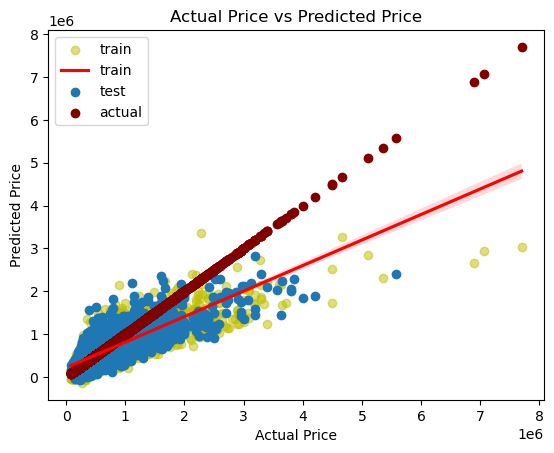

In [ ]:
train_test(x,y)


* The R-squared value (r2_score) is a measure of how well the model fits the data, with values closer to 1 indicating a better fit. In this case, the r2_score is 0.60, which suggests that the model explains 60% of the variability in the target variable.

* The mean absolute error (MAE) is a measure of the average magnitude of errors in the predictions made by the model. The lower the MAE, the better the model. The train MAE and test MAE are 153,308 and 155,208, respectively, which are quite large values, indicating that the model is not performing well.

* The mean squared error (MSE) is a measure of the average of the squared differences between the predicted and actual values. The train MSE and test MSE are 54,251,508,451 and 54,392,562,865, respectively, which are both quite large.

* The root mean squared error (RMSE) is the square root of the MSE, and it measures the average magnitude of the error in the model's predictions. The train RMSE and test RMSE are 232,919 and 233,222, respectively, which are also quite large.

Overall, these metrics suggest that the linear regression model is not performing very well in making accurate predictions on the dataset.

### Linear Transformation 

1. Log Transformation Model 

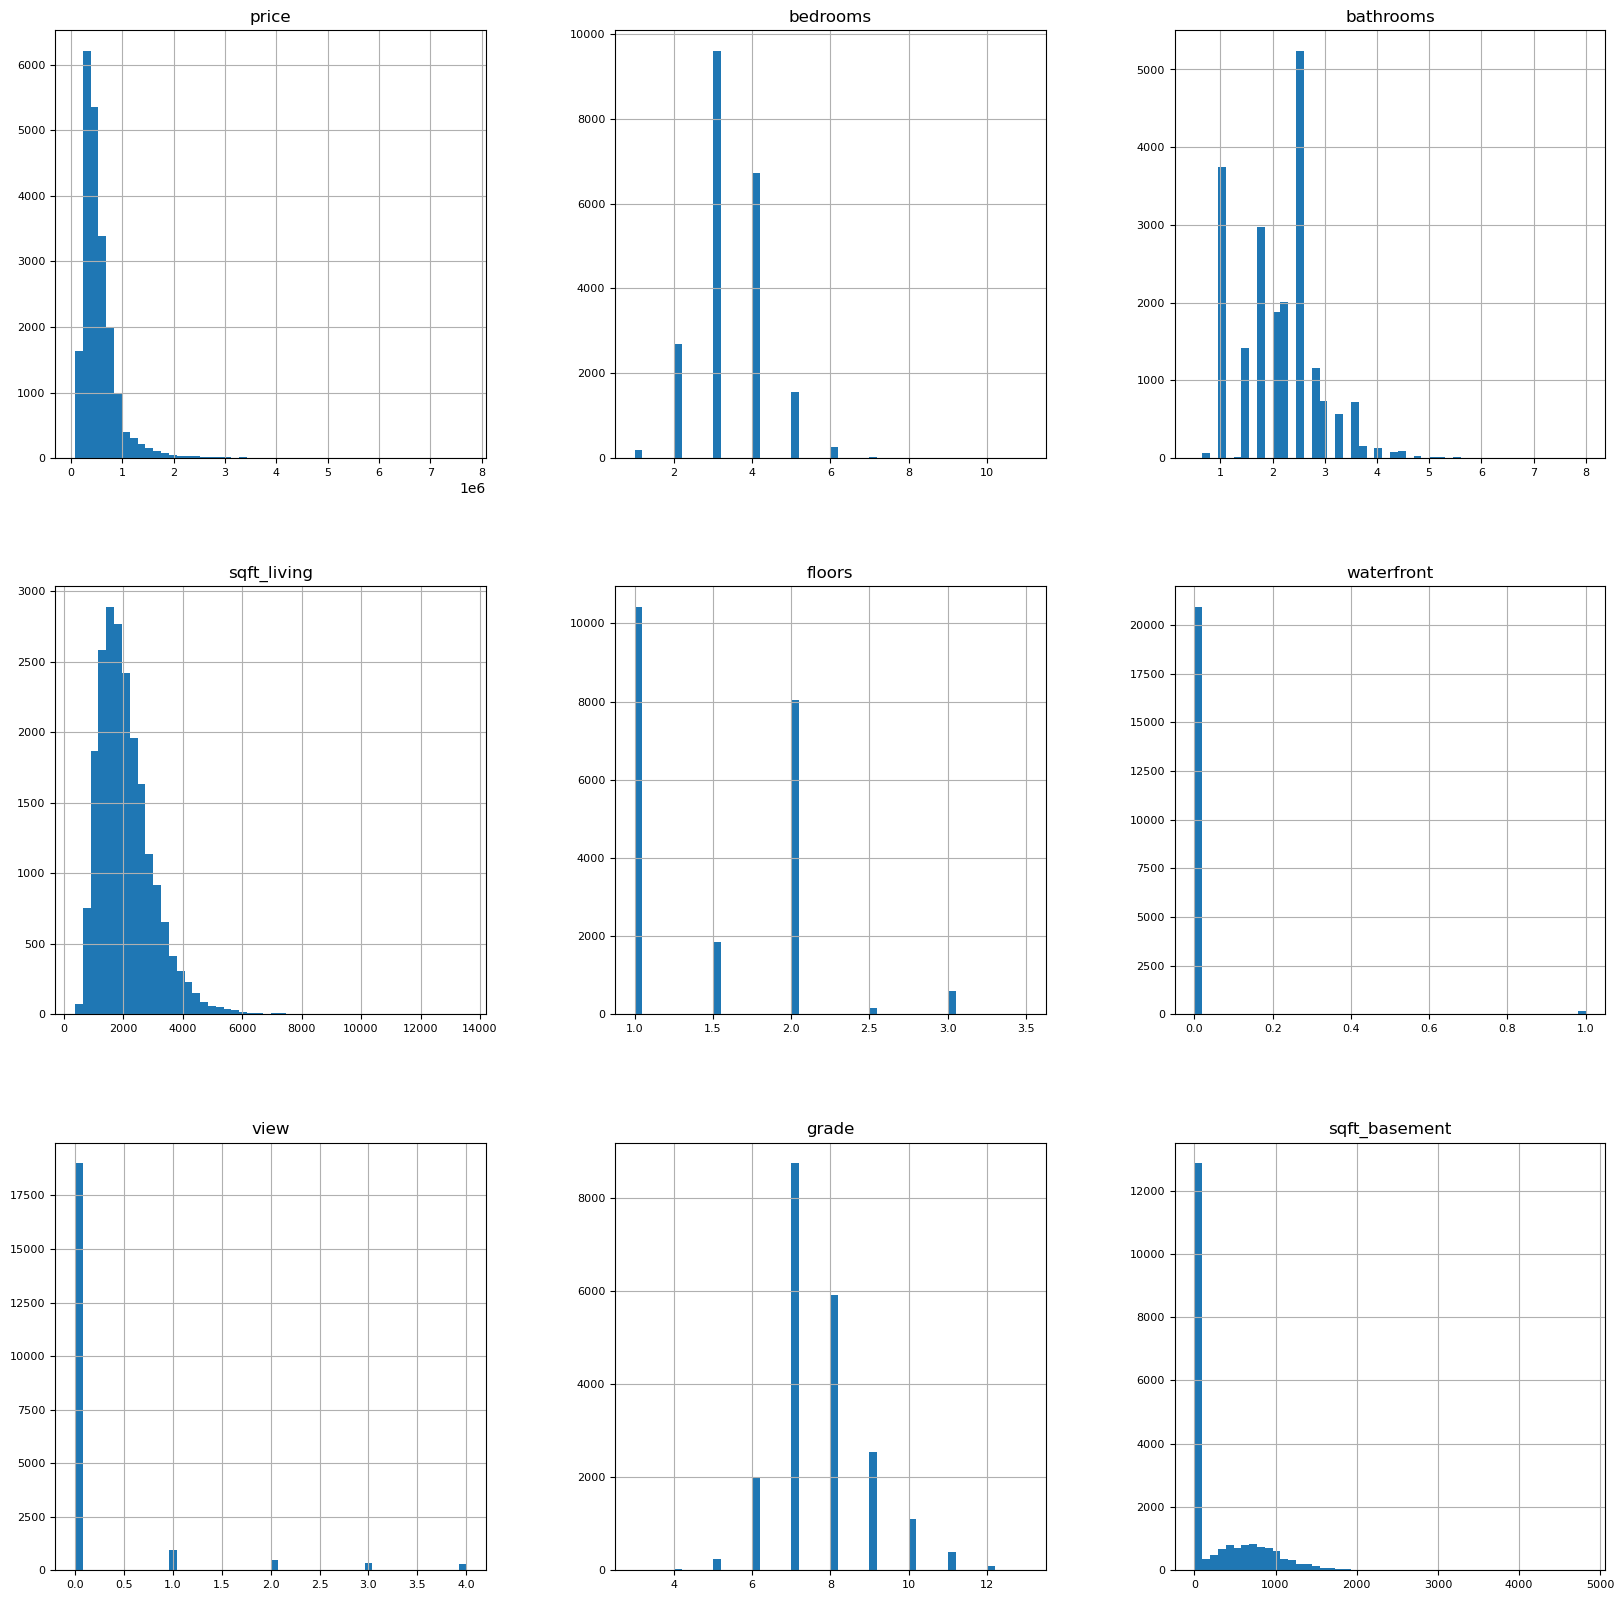

In [ ]:
# Copying the base model dataframe
log_model_df = base_model_df.copy()

# Plotting histograms of all the variables
log_model_df.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
colums_transform = ['price','sqft_living']

for col in colums_transform:
    log_model_df[col] = np.log(log_model_df[col])

log_model_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement
0,12.309982,3,1.00,7.073270,1.0,0,0,7,0.0
1,13.195614,3,2.25,7.851661,2.0,0,0,7,400.0
2,12.100712,2,1.00,6.646391,1.0,0,0,6,0.0
3,13.311329,4,3.00,7.580700,1.0,0,0,7,910.0
4,13.142166,3,2.00,7.426549,1.0,0,0,8,0.0


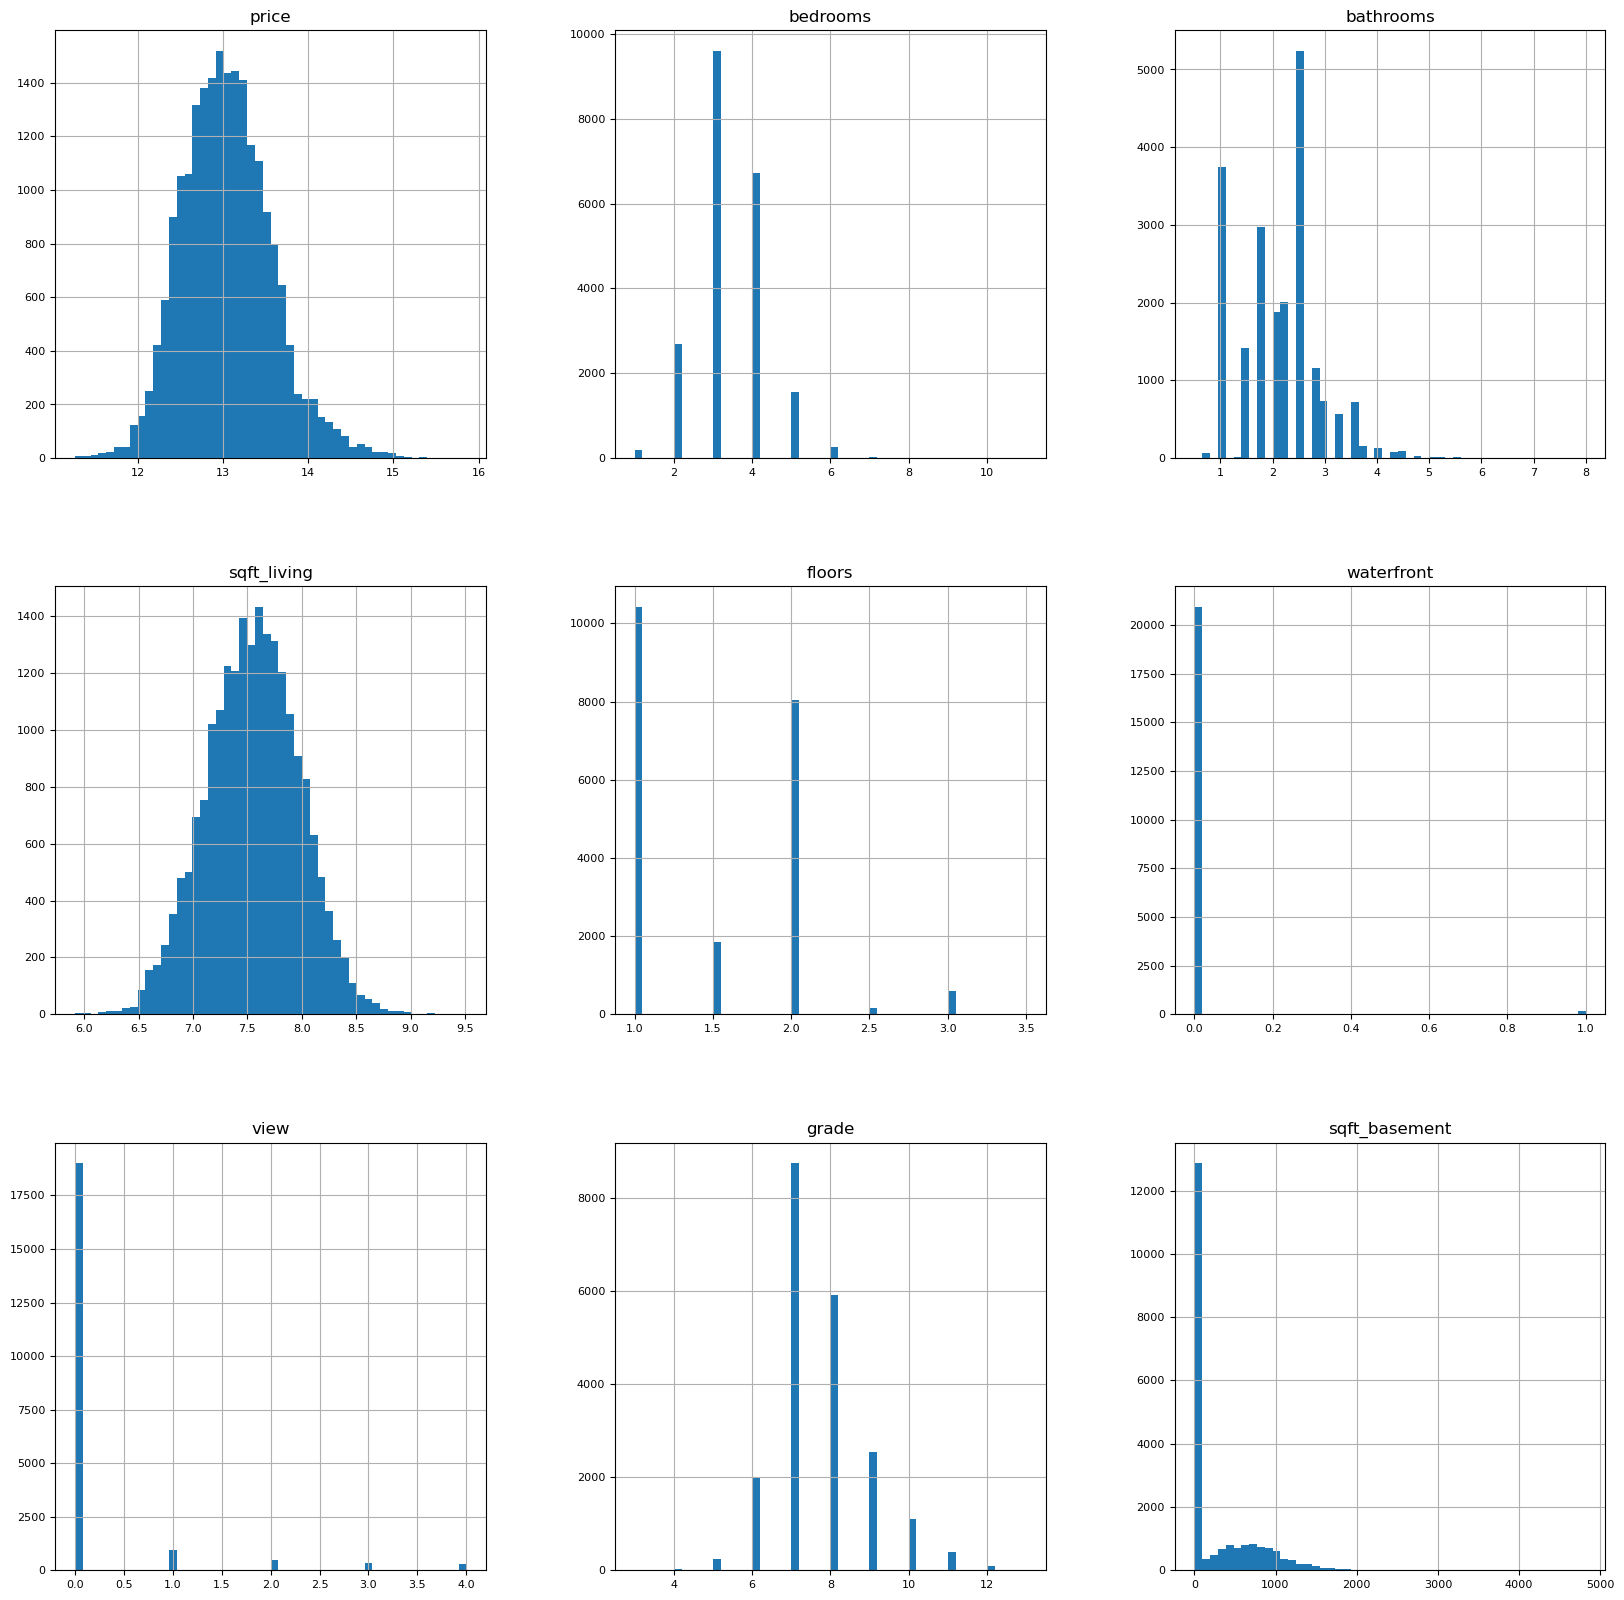

In [ ]:
# Plotting histograms of all log transformed variables
log_model_df.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

the r2_score: 0.5795840176186504 

train MAE: 0.2726774480653311
test MAE: 0.2739580604337145 

train MSE: 0.115361932473288
test MSE: 0.11754289642647334 

train root Mean squared Error:  0.33964972026087115
test root Mean squared Error:  0.3428452951791425 

mean_diff: 2.1057884232898796


,Actual Values,Predicted Value,Difference,Percentage Difference
4000,12.551434,12.833096,0.281662,2.244064
13454,13.161584,12.838218,0.323366,2.456894
6911,13.210374,12.641746,0.568628,4.304408
12662,12.751300,12.938813,0.187513,1.470544
2924,12.487485,12.768782,0.281297,2.252629


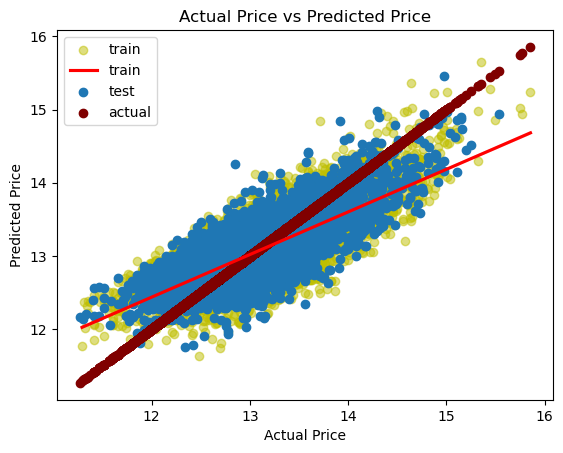

In [ ]:
# Defininf the target and features
y_l = log_model_df.price
X_l = log_model_df.drop('price', axis=1)

# train test 
train_test(X_l,y_l)

* An R2 score of 0.5795 indicates that the model explains 57.95% of the variance in the logarithmic actual values.
* An MAE value of 0.2727 for train data and 0.2739 for test data suggest that, on average, the model's logarithmic predictions are off by about 27.27% and 27.39% respectively from the logarithmic actual values.
* An MSE value of 0.1154 for train data and an MSE of 0.1175 for test data suggest that, on average, the model's logarithmic predictions are off by the squared value of about 11.54% and 11.75% respectively from the logarithmic actual values.
* An RMSE value of 0.3396 for train data and 0.3428 for test data suggest that, on average, the model's logarithmic predictions are off by the squared root value of about 33.96% and 34.28% respectively from the logarithmic actual values

In [ ]:
# Fitting the model
y = log_model_df.price
x = log_model_df.drop('price', axis=1)
log_model = sm.OLS(y, sm.add_constant(x)).fit()

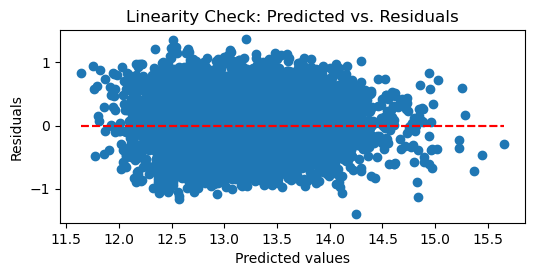

In [ ]:
# Linearity Check
linearity_check(log_model)

C:\Users\user\AppData\Local\Temp\ipykernel_17216\1378013660.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


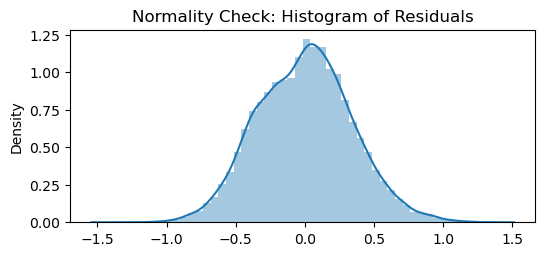

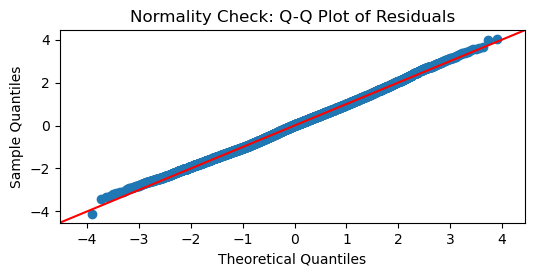

ShapiroResult(statistic=0.9989089369773865, pvalue=1.229137069902464e-10)


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Normality Check
normalirty_check(log_model.resid)

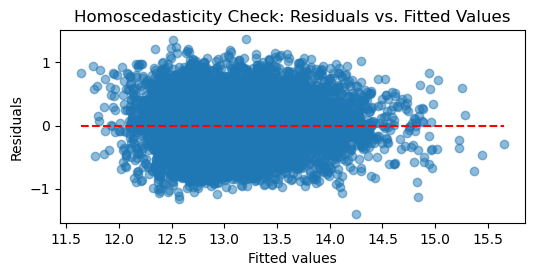

In [ ]:
# Homoscedasticity Check
homoscedasticity_check(log_model.resid, log_model.fittedvalues)

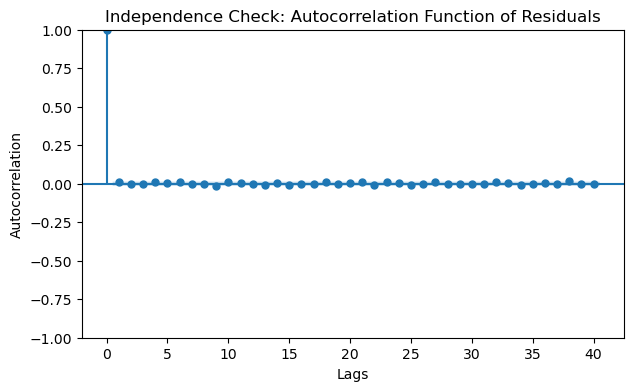

In [ ]:
# Independence Check
independence_check(log_model.resid)

* The log model model is better than the base model because it meets all the linearity tests. 
* Judging by the R Squired of the two models the base model is slightly higher than the log model meaning it does a better job of accounting for the variables, However the log model meets three of the four assumptions of linearity making it more linear compared to the base model, Hence this might be a truer prediction of price.

2. Polynomial Features model

In [ ]:
# Copying the base model dataframe
poly_model_df = base_model_df.copy()

# Defining the target and features
y_p = poly_model_df.price
X_p = poly_model_df.drop('price', axis=1)

# creating all polynomial combinations of the existing features up to degree 2
polynomial = PolynomialFeatures(degree=2,include_bias=False)

# fitting and transforming the data
poly_features = polynomial.fit_transform(X_p)


the r2_score: 0.669233321358385 

train MAE: 141902.50932986665
test MAE: 143141.5839514492 

train MSE: 44468558642.62899
test MSE: 45132115646.34162 

train root Mean squared Error:  210875.6947650179
test root Mean squared Error:  212443.20569587915 

mean_diff: 29.81892168545074


,Actual Values,Predicted Value,Difference,Percentage Difference
4000,282500.0,352927.845334,70427.845334,24.930211
13454,520000.0,397975.892402,122024.107598,23.466175
6911,546000.0,331452.712276,214547.287724,39.294375
12662,345000.0,411919.116202,66919.116202,19.396845
2924,265000.0,344621.510183,79621.510183,30.045853


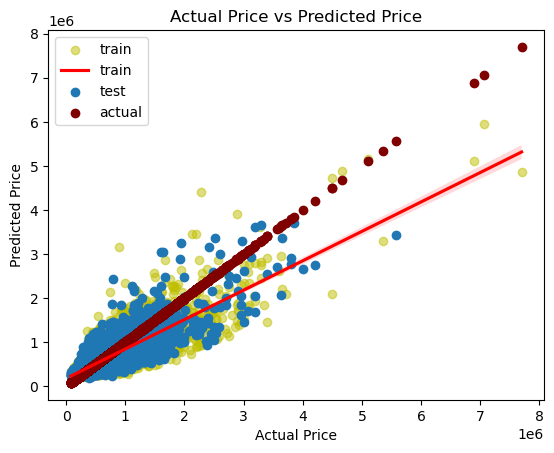

In [ ]:
# training and testing the model
train_test(poly_features,y_p)

* The r2_score is 0.669, indicating that the model explains about 66.9% of the variation in the target variable.
* The train MAE is 141902.51 and the test MAE is 143141.58. This means that, on average, the model's predictions are off by about $141,902.51 in the training data and $143,141.58 in the test data.
* The train MSE is 44468558642.63 and the test MSE is 45132115646.34. The MSE is larger than the MAE because it penalizes larger errors more heavily.
* The train RMSE is 210875.69 and the test RMSE is 212443.21. The RMSE is in the same units as the target variable, and it can be interpreted as the average absolute difference between the actual and predicted values, after taking into account the scale of the target variable.

In summary, these metrics can be used to evaluate the performance of the model. In this case, the model has a decent r2_score, but its MAE and RMSE indicate that there is still room for improvement in the model's predictive accuracy.

In [ ]:
# Fitting the model
y = poly_model_df.price
x = poly_model_df.drop('price', axis=1)
poly_model = sm.OLS(y, sm.add_constant(x)).fit()

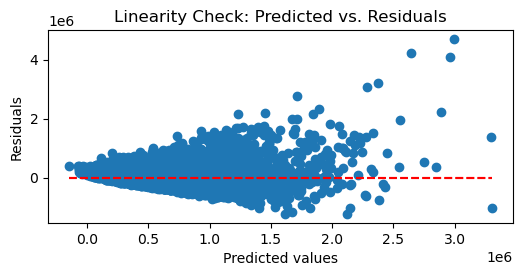

In [ ]:
# Linearity Check
linearity_check(poly_model)

C:\Users\user\AppData\Local\Temp\ipykernel_17216\1378013660.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


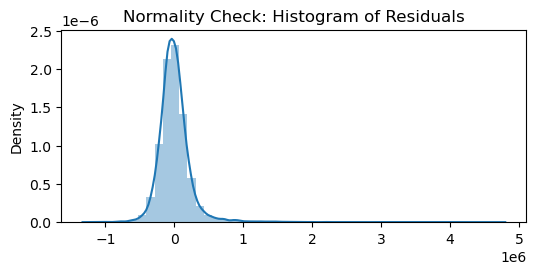

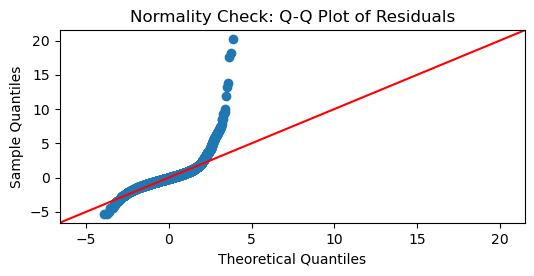

ShapiroResult(statistic=0.8438373804092407, pvalue=0.0)


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Normality Check
normalirty_check(poly_model.resid)


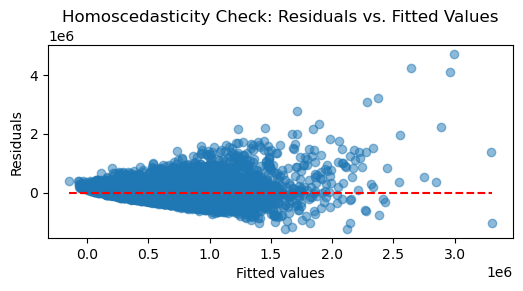

In [ ]:
# Homoscedasticity Check
homoscedasticity_check(poly_model.resid, poly_model.fittedvalues)

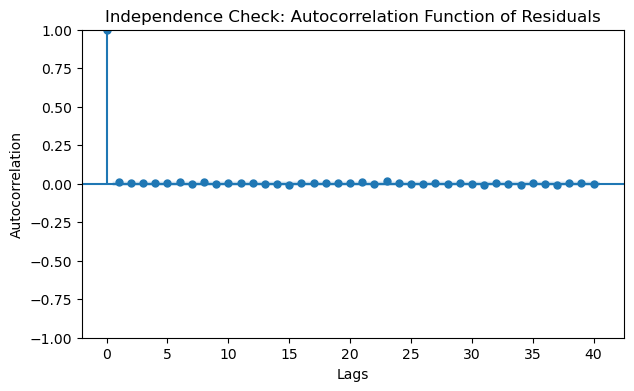

In [ ]:
# Independence Check
independence_check(poly_model.resid)

## How we can make our model made better predictions.

* Add more relevant features: One way to improve the R-squared is by adding more relevant features to the model. These features should have a strong correlation with the dependent variable and be independent from each other.

* Remove irrelevant features: Removing features that do not contribute to explaining the dependent variable can also improve the R-squared. These features should have a low correlation with the dependent variable and/or be highly correlated with other features.

* Transform the features: Transforming the features, such as taking the logarithm or square root, can sometimes improve the R-squared by better capturing the underlying relationship between the features and the dependent variable.
* Increase the sample size: A larger sample size can sometimes lead to a higher R-squared, as it provides more data to estimate the model parameters.

* Use a different model: If the current model is not providing a good fit, it may be worth exploring other types of models, such as polynomial regression or machine learning models like decision trees or neural networks.

#### It is important to note that improving the R-squared should not be the only goal when building a model. The model should also be evaluated based on its ability to make accurate predictions, its interpretability, and its usefulness in answering the research question.'''
